# **Data Loading**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('train_FD001.txt', sep=" ", header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN


## The last two columns have values as NaN so we need to drop them.

In [3]:
# Create a list of column indices to drop
columns_to_drop = [27, 26]

# Drop the columns from the DataFrame
df = df.drop(df.columns[columns_to_drop], axis=1)

df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


## The data consists of the following columns as given in the dataset description:


*   Engine Unit Number
*   Time (In Cycles)
*   Operating Settings 1
*   Operating Settings 2
*   Operating Settings 3
*   Sensor Readings 1
*   ...
*   ...
*   ...
*   Sensor Readings 21

In [4]:
df.columns = df.columns.astype(str)
column_names = df.columns
print(column_names)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25'],
      dtype='object')


## We need to renase these columns to actual column names.

In [5]:
new_column_names = {
    '0': 'Engine_Unit_Number',
    '1': 'Time_In_Cycles',
    '2': 'Operating_settings_1',
    '3': 'Operating_settings_2',
    '4': 'Operating_settings_3',
    '5': 'Sensor_readings_1',
    '6': 'Sensor_readings_2',
    '7': 'Sensor_readings_3',
    '8': 'Sensor_readings_4',
    '9': 'Sensor_readings_5',
    '10': 'Sensor_readings_6',
    '11': 'Sensor_readings_7',
    '12': 'Sensor_readings_8',
    '13': 'Sensor_readings_9',
    '14': 'Sensor_readings_10',
    '15': 'Sensor_readings_11',
    '16': 'Sensor_readings_12',
    '17': 'Sensor_readings_13',
    '18': 'Sensor_readings_14',
    '19': 'Sensor_readings_15',
    '20': 'Sensor_readings_16',
    '21': 'Sensor_readings_17',
    '22': 'Sensor_readings_18',
    '23': 'Sensor_readings_19',
    '24': 'Sensor_readings_20',
    '25': 'Sensor_readings_21'
}

df = df.rename(columns=new_column_names)


In [6]:
df.describe()

,Engine_Unit_Number,Time_In_Cycles,Operating_settings_1,Operating_settings_2,Operating_settings_3,Sensor_readings_1,Sensor_readings_2,Sensor_readings_3,Sensor_readings_4,Sensor_readings_5,...,Sensor_readings_12,Sensor_readings_13,Sensor_readings_14,Sensor_readings_15,Sensor_readings_16,Sensor_readings_17,Sensor_readings_18,Sensor_readings_19,Sensor_readings_20,Sensor_readings_21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


#### We can drop the sensor readings with a standard deviation of 0 and create a new dataframe to facilitate experimentation and analysis.

In [7]:
df.std()

Engine_Unit_Number      2.922763e+01
Time_In_Cycles          6.888099e+01
Operating_settings_1    2.187313e-03
Operating_settings_2    2.930621e-04
Operating_settings_3    0.000000e+00
Sensor_readings_1       6.537152e-11
Sensor_readings_2       5.000533e-01
Sensor_readings_3       6.131150e+00
Sensor_readings_4       9.000605e+00
Sensor_readings_5       3.394700e-12
Sensor_readings_6       1.388985e-03
Sensor_readings_7       8.850923e-01
Sensor_readings_8       7.098548e-02
Sensor_readings_9       2.208288e+01
Sensor_readings_10      4.660829e-13
Sensor_readings_11      2.670874e-01
Sensor_readings_12      7.375534e-01
Sensor_readings_13      7.191892e-02
Sensor_readings_14      1.907618e+01
Sensor_readings_15      3.750504e-02
Sensor_readings_16      1.556432e-14
Sensor_readings_17      1.548763e+00
Sensor_readings_18      0.000000e+00
Sensor_readings_19      0.000000e+00
Sensor_readings_20      1.807464e-01
Sensor_readings_21      1.082509e-01
dtype: float64

Note that sensors, 5, 6 and 16 have very little fluctuation, while sensors 9 and 14 have the highest fluctuations...

In [8]:
# Dropping columns
drop_columns = ['Sensor_readings_18', 'Sensor_readings_19', 'Sensor_readings_10', 'Sensor_readings_1']
df = df.drop(drop_columns, axis = 1)
df

,Engine_Unit_Number,Time_In_Cycles,Operating_settings_1,Operating_settings_2,Operating_settings_3,Sensor_readings_2,Sensor_readings_3,Sensor_readings_4,Sensor_readings_5,Sensor_readings_6,...,Sensor_readings_9,Sensor_readings_11,Sensor_readings_12,Sensor_readings_13,Sensor_readings_14,Sensor_readings_15,Sensor_readings_16,Sensor_readings_17,Sensor_readings_20,Sensor_readings_21
0,1,1,-0.0007,-0.0004,100.0,641.82,1589.70,1400.60,14.62,21.61,...,9046.19,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,642.15,1591.82,1403.14,14.62,21.61,...,9044.07,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,642.35,1587.99,1404.20,14.62,21.61,...,9052.94,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,642.35,1582.79,1401.87,14.62,21.61,...,9049.48,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,642.37,1582.85,1406.22,14.62,21.61,...,9055.15,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,643.49,1597.98,1428.63,14.62,21.61,...,9065.52,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,643.54,1604.50,1433.58,14.62,21.61,...,9065.11,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,643.42,1602.46,1428.18,14.62,21.61,...,9065.90,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,643.23,1605.26,1426.53,14.62,21.61,...,9073.72,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,38.29,23.0640


In [9]:
def add_remaining_useful_life(df):
    # Getting the total number of cycles for each unit
    grouped_by_unit = df.groupby(by="Engine_Unit_Number")
    max_cycle = grouped_by_unit["Time_In_Cycles"].max()

    # Merging the max cycle back into the original frame
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='Engine_Unit_Number', right_index=True)

    # Calculating remaining useful life for each row
    remaining_useful_life = result_frame["max_cycle"] - result_frame["Time_In_Cycles"]
    result_frame["RUL"] = remaining_useful_life

    # dropping max_cycle as it's no longer needed
    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame

df = add_remaining_useful_life(df)
df.head()

,Engine_Unit_Number,Time_In_Cycles,Operating_settings_1,Operating_settings_2,Operating_settings_3,Sensor_readings_2,Sensor_readings_3,Sensor_readings_4,Sensor_readings_5,Sensor_readings_6,...,Sensor_readings_11,Sensor_readings_12,Sensor_readings_13,Sensor_readings_14,Sensor_readings_15,Sensor_readings_16,Sensor_readings_17,Sensor_readings_20,Sensor_readings_21,RUL
0,1,1,-0.0007,-0.0004,100.0,641.82,1589.70,1400.60,14.62,21.61,...,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,642.15,1591.82,1403.14,14.62,21.61,...,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,642.35,1587.99,1404.20,14.62,21.61,...,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,642.35,1582.79,1401.87,14.62,21.61,...,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,642.37,1582.85,1406.22,14.62,21.61,...,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,38.90,23.4044,187


# **Data Visualisations**

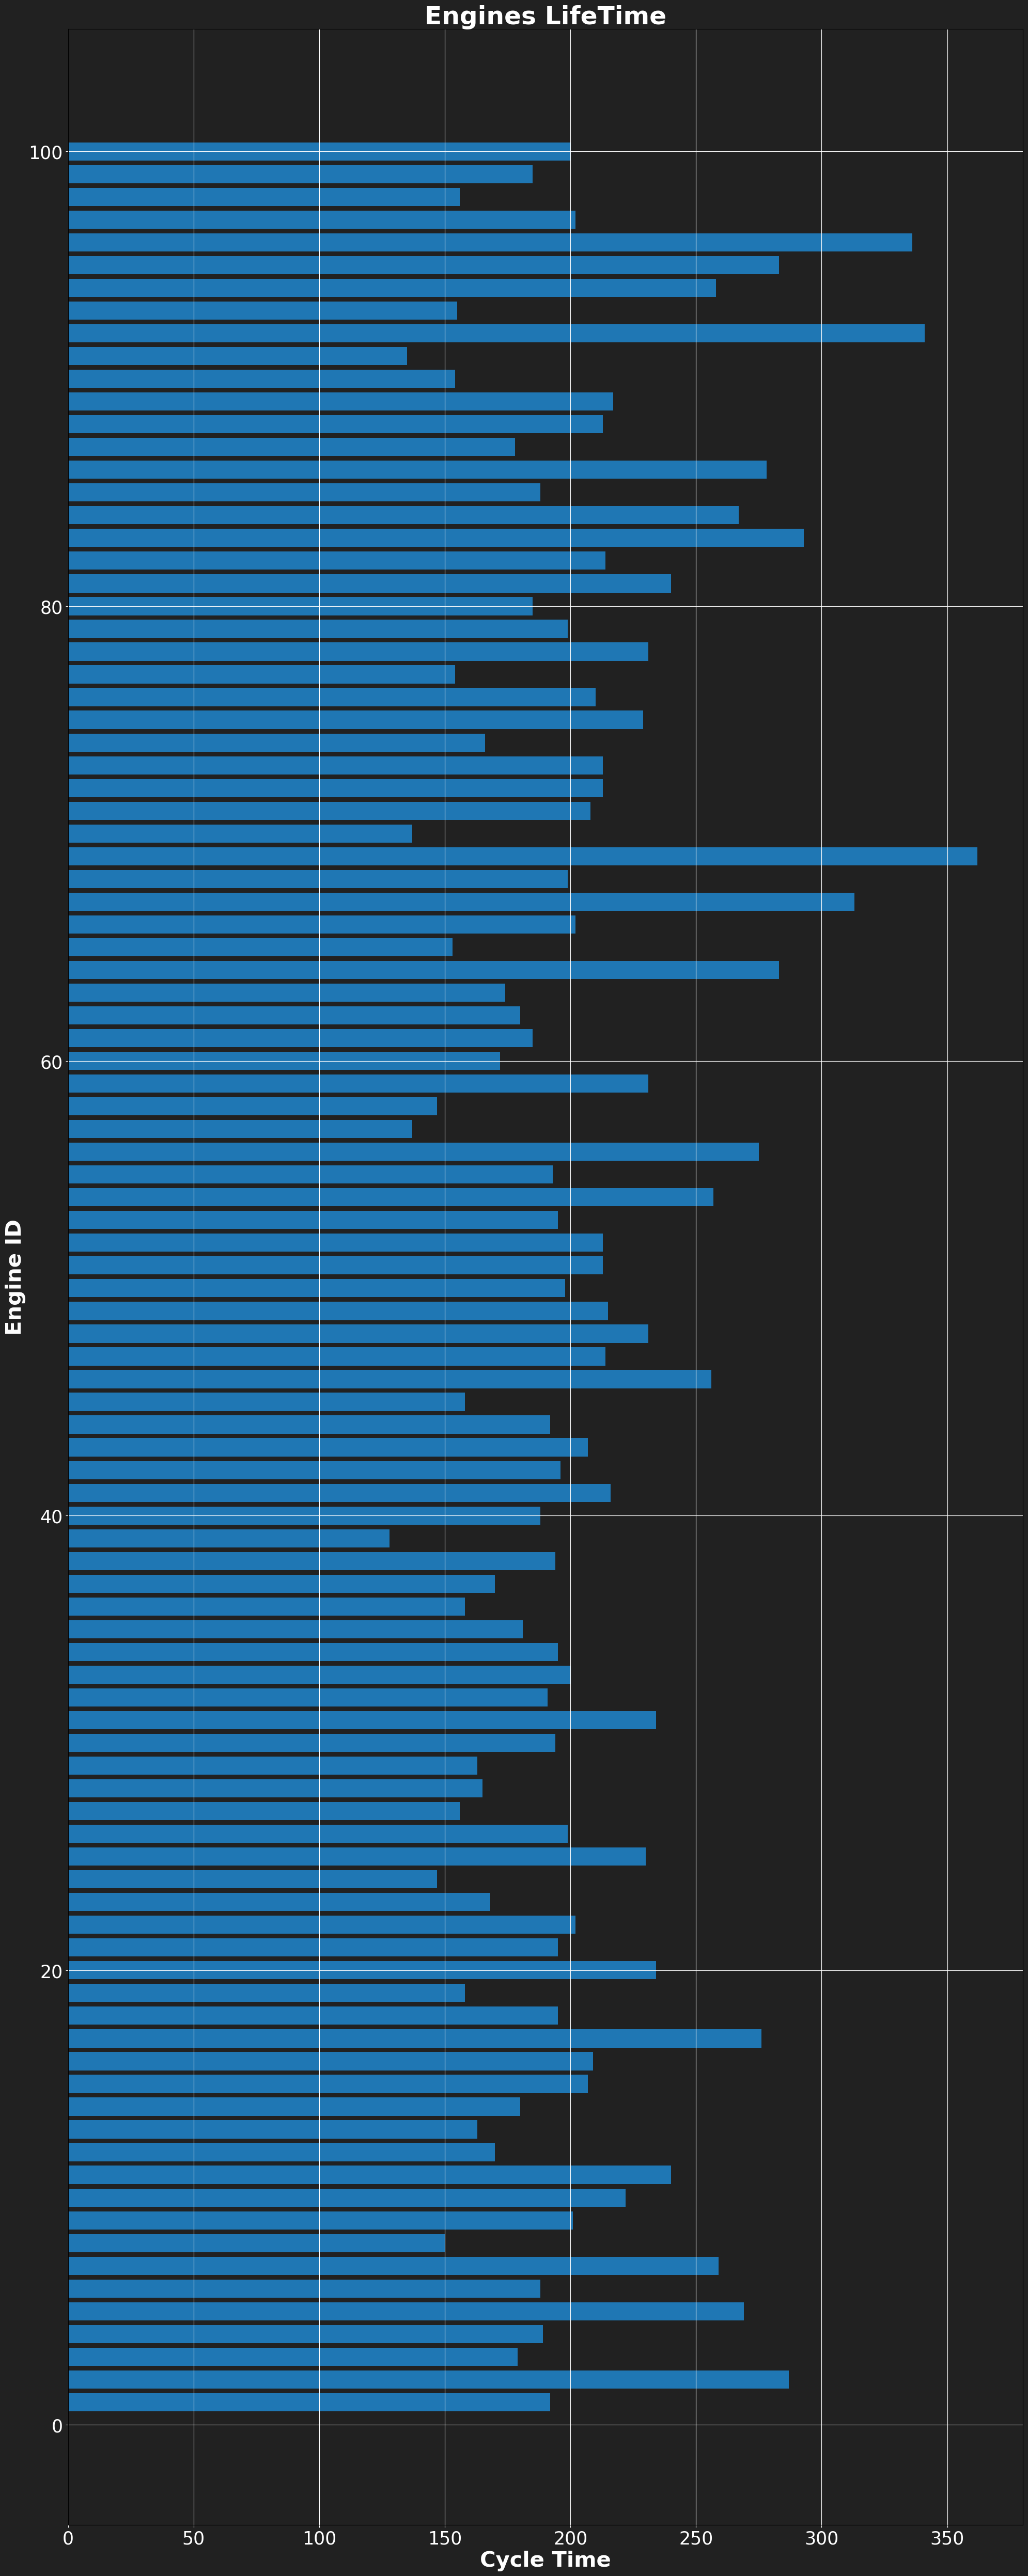

In [10]:
import matplotlib.pyplot as plt

# Create the figure and axes with a specific size
fig, ax = plt.subplots(figsize=(20, 50))

# Set the background color
fig.patch.set_facecolor('#212121')  # Set a specific color code for the background
ax.set_facecolor('#212121')

# Group the dataframe by 'Engine_Unit_Number' and find the maximum 'Time_In_Cycles' for each group
engine_cycles = df.groupby('Engine_Unit_Number')['Time_In_Cycles'].max()

# Plot the horizontal bar chart
ax.barh(engine_cycles.index, engine_cycles, height=0.8, align='center')

# Set the title and axis labels
ax.set_title('Engines LifeTime', fontweight='bold', size=35, color='white')
ax.set_xlabel('Cycle Time', fontweight='bold', size=30, color='white')
ax.set_ylabel('Engine ID', fontweight='bold', size=30, color='white')

# Set the tick labels font size and color
ax.tick_params(axis='both', labelsize=25, colors='white')

# Enable gridlines
ax.grid(True, color='white')

# Adjust the layout for better spacing
fig.tight_layout()

# Display the plot
plt.show()


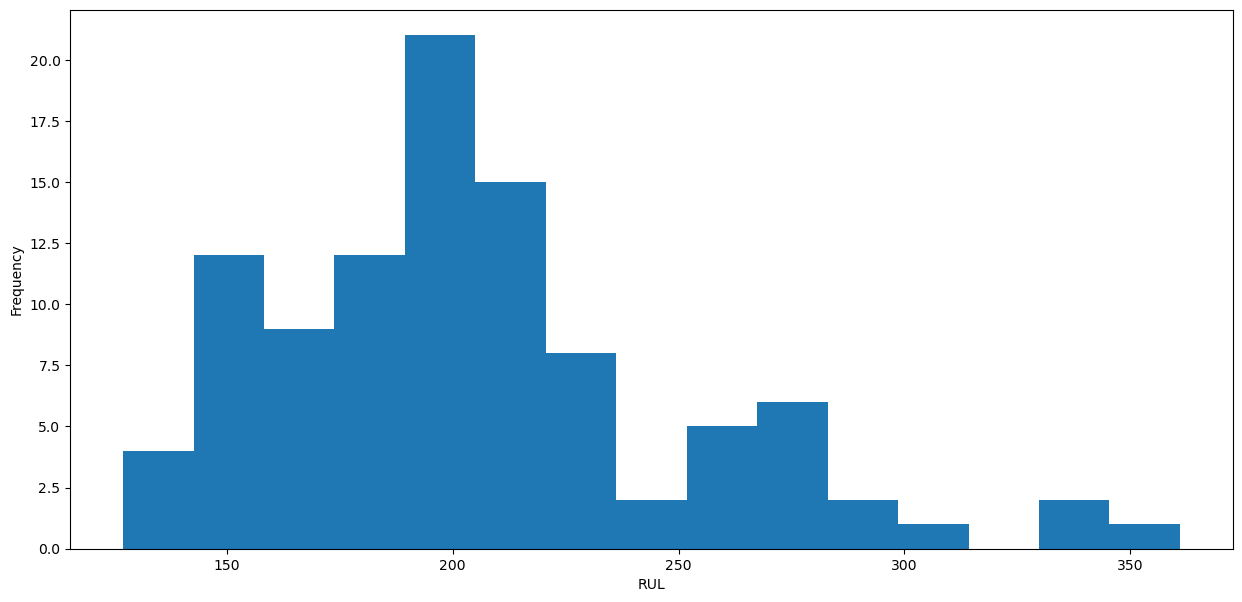

In [11]:
# Calculate the maximum RUL for each engine unit number
df_max_rul = df.groupby('Engine_Unit_Number')['RUL'].max()

# Create a new figure with a specific size
fig, ax = plt.subplots(figsize=(15, 7))

# Plot the histogram of RUL values
ax.hist(df_max_rul, bins=15)

# Set the x-axis and y-axis labels
ax.set_xlabel('RUL')
ax.set_ylabel('Frequency')

# Display the plot
plt.show()


In [12]:
import matplotlib.pyplot as plt
import numpy as np

def plot_sensor(sensor_name):
    fig, ax = plt.subplots(figsize=(13, 5))

    for engine_num in range(0, df['Engine_Unit_Number'].nunique(), 10):
        engine_data = df[df['Engine_Unit_Number'] == engine_num]
        ax.plot(engine_data['RUL'], engine_data[sensor_name])

    ax.set_xlim(250, 0)
    ax.set_xticks(np.arange(0, 275, 25))
    ax.set_ylabel(sensor_name)
    ax.set_xlabel('Remaining Useful Life')

    plt.show()


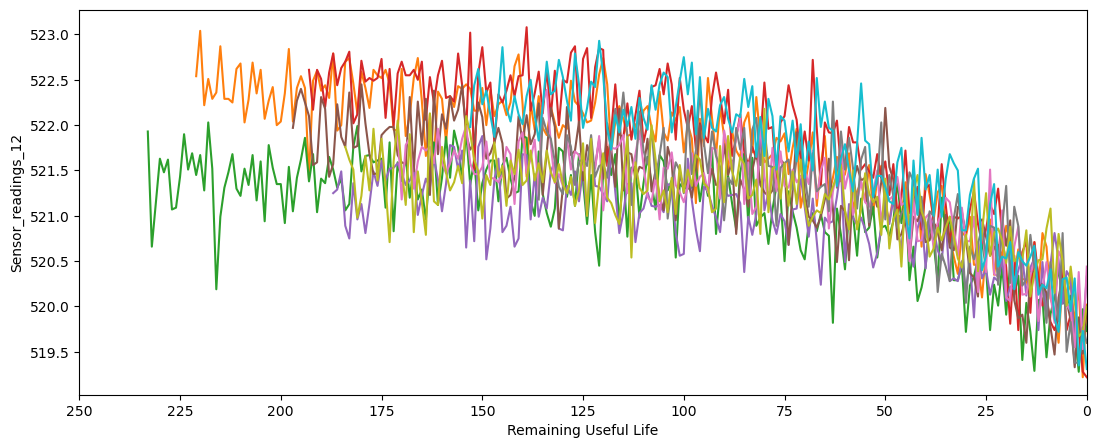

In [13]:
plot_sensor("Sensor_readings_12")

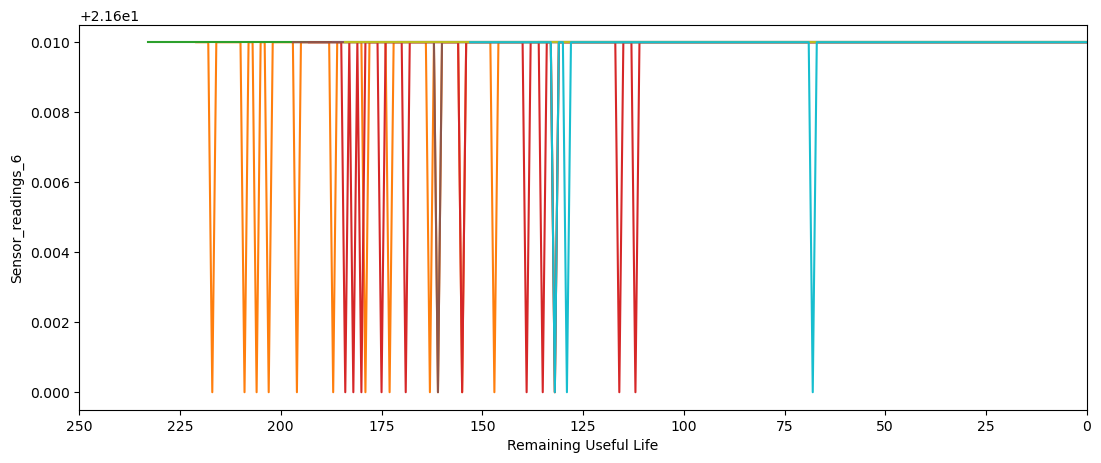

In [14]:
plot_sensor("Sensor_readings_6")

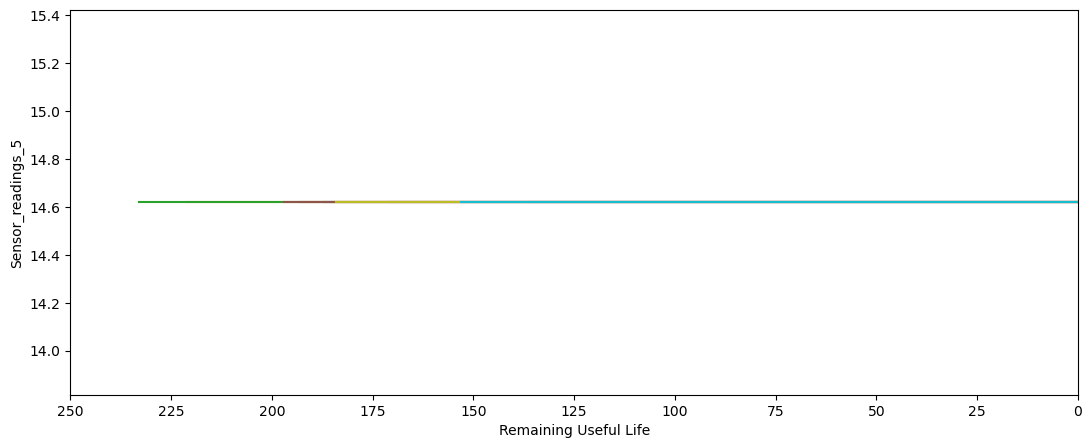

In [15]:
plot_sensor("Sensor_readings_5")

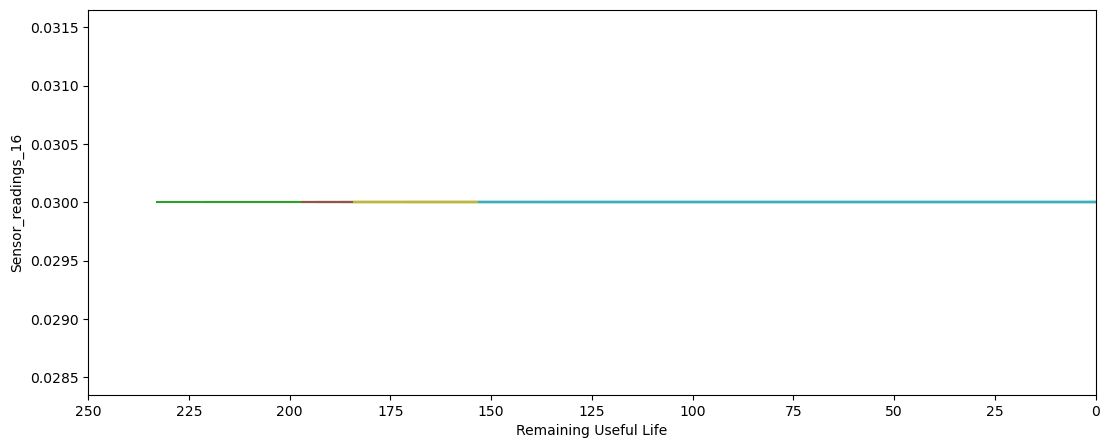

In [16]:
plot_sensor("Sensor_readings_16")

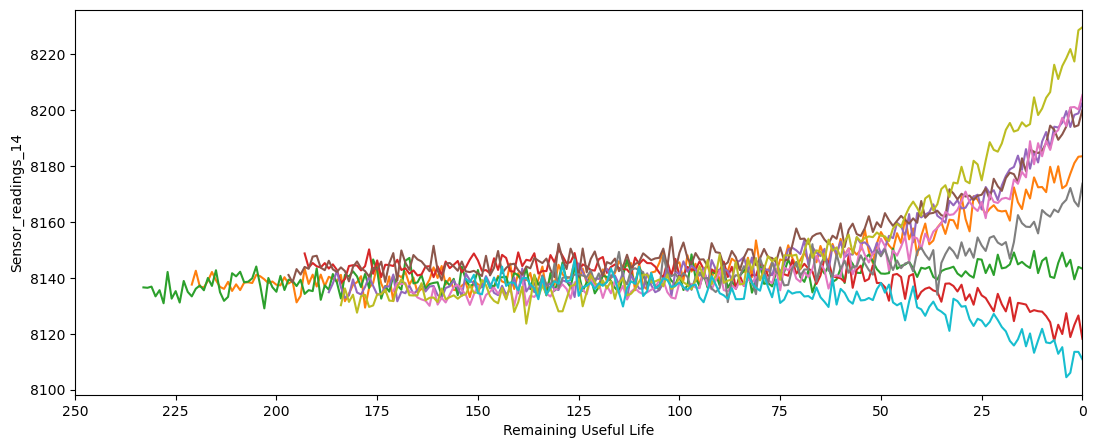

In [17]:
plot_sensor("Sensor_readings_14")

In [18]:
drop_columns = ['Sensor_readings_5', 'Sensor_readings_6', 'Sensor_readings_16']
df = df.drop(drop_columns, axis = 1)
df.head()

,Engine_Unit_Number,Time_In_Cycles,Operating_settings_1,Operating_settings_2,Operating_settings_3,Sensor_readings_2,Sensor_readings_3,Sensor_readings_4,Sensor_readings_7,Sensor_readings_8,Sensor_readings_9,Sensor_readings_11,Sensor_readings_12,Sensor_readings_13,Sensor_readings_14,Sensor_readings_15,Sensor_readings_17,Sensor_readings_20,Sensor_readings_21,RUL
0,1,1,-0.0007,-0.0004,100.0,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187


### Normalization

In [19]:
# Selecting columns for normalization
columns_to_normalize = ['Operating_settings_1',	'Operating_settings_2',	'Operating_settings_3', 'Sensor_readings_2',	'Sensor_readings_3',	'Sensor_readings_4',	'Sensor_readings_7',	'Sensor_readings_8', 'Sensor_readings_9',	'Sensor_readings_11',	'Sensor_readings_12',	'Sensor_readings_13',	'Sensor_readings_14',	'Sensor_readings_15',	'Sensor_readings_17',	'Sensor_readings_20',	'Sensor_readings_21']

# Extracting the columns to be normalized
columns_data = df[columns_to_normalize]

# Performing the Min-Max normalization on selected columns
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(columns_data)

# Updating the DataFrame with normalized values
df[columns_to_normalize] = normalized_data

df

,Engine_Unit_Number,Time_In_Cycles,Operating_settings_1,Operating_settings_2,Operating_settings_3,Sensor_readings_2,Sensor_readings_3,Sensor_readings_4,Sensor_readings_7,Sensor_readings_8,Sensor_readings_9,Sensor_readings_11,Sensor_readings_12,Sensor_readings_13,Sensor_readings_14,Sensor_readings_15,Sensor_readings_17,Sensor_readings_20,Sensor_readings_21,RUL
0,1,1,0.459770,0.166667,0.0,0.183735,0.406802,0.309757,0.726248,0.242424,0.109755,0.369048,0.633262,0.205882,0.199608,0.363986,0.333333,0.713178,0.724662,191
1,1,2,0.609195,0.250000,0.0,0.283133,0.453019,0.352633,0.628019,0.212121,0.100242,0.380952,0.765458,0.279412,0.162813,0.411312,0.333333,0.666667,0.731014,190
2,1,3,0.252874,0.750000,0.0,0.343373,0.369523,0.370527,0.710145,0.272727,0.140043,0.250000,0.795309,0.220588,0.171793,0.357445,0.166667,0.627907,0.621375,189
3,1,4,0.540230,0.500000,0.0,0.343373,0.256159,0.331195,0.740741,0.318182,0.124518,0.166667,0.889126,0.294118,0.174889,0.166603,0.333333,0.573643,0.662386,188
4,1,5,0.390805,0.333333,0.0,0.349398,0.257467,0.404625,0.668277,0.242424,0.149960,0.255952,0.746269,0.235294,0.174734,0.402078,0.416667,0.589147,0.704502,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,0.477011,0.250000,0.0,0.686747,0.587312,0.782917,0.254428,0.439394,0.196491,0.726190,0.170576,0.558824,0.194344,0.656791,0.750000,0.271318,0.109500,4
20627,100,197,0.408046,0.083333,0.0,0.701807,0.729453,0.866475,0.162641,0.500000,0.194651,0.708333,0.211087,0.500000,0.188668,0.727203,0.583333,0.124031,0.366197,3
20628,100,198,0.522989,0.500000,0.0,0.665663,0.684979,0.775321,0.175523,0.515152,0.198196,0.738095,0.281450,0.529412,0.212148,0.922278,0.833333,0.232558,0.053991,2
20629,100,199,0.436782,0.750000,0.0,0.608434,0.746021,0.747468,0.133655,0.530303,0.233285,0.916667,0.208955,0.514706,0.203065,0.823394,0.583333,0.116279,0.234466,1


In [20]:
# Grouping the DataFrame by the 'Engine_Unit_Number' column
grouped = df.groupby('Engine_Unit_Number')

# Iterating over the groups and creating individual DataFrames
individual_dfxstd = []
for group_name, group_df in grouped:
    individual_dfxstd.append(group_df)

individual_dfxstd[1]

,Engine_Unit_Number,Time_In_Cycles,Operating_settings_1,Operating_settings_2,Operating_settings_3,Sensor_readings_2,Sensor_readings_3,Sensor_readings_4,Sensor_readings_7,Sensor_readings_8,Sensor_readings_9,Sensor_readings_11,Sensor_readings_12,Sensor_readings_13,Sensor_readings_14,Sensor_readings_15,Sensor_readings_17,Sensor_readings_20,Sensor_readings_21,RUL
192,2,1,0.396552,1.000000,0.0,0.204819,0.279049,0.152431,0.753623,0.166667,0.148030,0.047619,0.776119,0.264706,0.194963,0.252405,0.250000,0.620155,0.779205,286
193,2,2,0.747126,0.250000,0.0,0.183735,0.349030,0.183660,0.792271,0.121212,0.132729,0.232143,0.855011,0.147059,0.160749,0.353213,0.333333,0.713178,0.710163,285
194,2,3,0.603448,0.750000,0.0,0.102410,0.376717,0.282073,0.851852,0.212121,0.145876,0.220238,0.829424,0.161765,0.209722,0.212774,0.250000,0.751938,0.732947,284
195,2,4,0.701149,0.166667,0.0,0.141566,0.285808,0.233457,0.708535,0.121212,0.162793,0.148810,0.810235,0.073529,0.209000,0.295883,0.250000,0.767442,0.840238,283
196,2,5,0.528736,0.833333,0.0,0.156627,0.174188,0.342167,0.848631,0.196970,0.163421,0.238095,0.763326,0.088235,0.189545,0.237784,0.166667,0.806202,0.730737,282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,2,283,0.764368,0.666667,0.0,0.774096,0.675605,0.800473,0.259259,0.393939,0.279996,0.809524,0.294243,0.470588,0.386572,0.750289,0.833333,0.217054,0.195526,4
475,2,284,0.465517,0.583333,0.0,0.813253,0.660780,0.806718,0.339775,0.484848,0.305752,0.791667,0.268657,0.485294,0.345185,0.785687,0.583333,0.069767,0.311240,3
476,2,285,0.459770,0.833333,0.0,0.740964,0.562459,0.825793,0.161031,0.454545,0.345239,0.845238,0.260128,0.500000,0.334864,0.766833,0.666667,0.193798,0.305579,2
477,2,286,0.442529,0.250000,0.0,0.671687,0.710486,0.798785,0.283414,0.424242,0.360226,0.767857,0.174840,0.500000,0.361389,0.647557,0.583333,0.147287,0.169428,1


# Training on various types of Models

In [21]:
x = df[['Operating_settings_1',	'Operating_settings_2',	'Operating_settings_3',	'Sensor_readings_2',	'Sensor_readings_3',	'Sensor_readings_4',	'Sensor_readings_7',	'Sensor_readings_8',	'Sensor_readings_9',	'Sensor_readings_11',	'Sensor_readings_12',	'Sensor_readings_13',	'Sensor_readings_14',	'Sensor_readings_15',	'Sensor_readings_17',	'Sensor_readings_20',	'Sensor_readings_21']]
y = df['RUL']

## **Linear Regression**

In [22]:
x_train_lr, x_test_lr, y_train_lr, y_test_lr = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [23]:
x_train_lr

,Operating_settings_1,Operating_settings_2,Operating_settings_3,Sensor_readings_2,Sensor_readings_3,Sensor_readings_4,Sensor_readings_7,Sensor_readings_8,Sensor_readings_9,Sensor_readings_11,Sensor_readings_12,Sensor_readings_13,Sensor_readings_14,Sensor_readings_15,Sensor_readings_17,Sensor_readings_20,Sensor_readings_21
12862,0.160920,0.750000,0.0,0.563253,0.458470,0.345712,0.684380,0.287879,0.182940,0.488095,0.658849,0.235294,0.172360,0.404771,0.416667,0.410853,0.660315
9936,0.459770,0.166667,0.0,0.301205,0.211031,0.199865,0.561997,0.136364,0.202100,0.214286,0.848614,0.220588,0.227681,0.226241,0.333333,0.728682,0.655068
12025,0.718391,0.250000,0.0,0.265060,0.331589,0.367657,0.711755,0.242424,0.176523,0.220238,0.641791,0.191176,0.203220,0.382840,0.250000,0.635659,0.563795
14526,0.597701,0.666667,0.0,0.695783,0.586658,0.702566,0.381643,0.469697,0.042403,0.648810,0.296375,0.411765,0.050882,0.646787,0.500000,0.310078,0.405965
16747,0.522989,0.333333,0.0,0.340361,0.339656,0.330351,0.689211,0.242424,0.147267,0.220238,0.756930,0.220588,0.146300,0.320123,0.333333,0.728682,0.765396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.206897,0.583333,0.0,0.295181,0.478526,0.136732,0.657005,0.242424,0.081082,0.255952,0.650320,0.279412,0.171432,0.419777,0.416667,0.627907,0.457885
11964,0.712644,0.833333,0.0,0.180723,0.208197,0.368670,0.793881,0.166667,0.198196,0.250000,0.946695,0.147059,0.235473,0.237399,0.166667,0.612403,0.709334
5390,0.597701,0.500000,0.0,0.388554,0.651188,0.561951,0.587762,0.287879,0.176344,0.375000,0.637527,0.294118,0.262979,0.278953,0.333333,0.472868,0.637807
860,0.500000,0.833333,0.0,0.216867,0.152387,0.236833,0.752013,0.106061,0.184645,0.244048,0.746269,0.220588,0.275880,0.371297,0.416667,0.720930,0.661558


In [24]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(x_train_lr, y_train_lr)

LinearRegression()

In [25]:
y_pred_lr = reg.predict(x_test_lr)
y_pred_lr[y_pred_lr <= 0] = 0
# y_pred_lr = y_pred_lr.flatten()
y_pred_lr

array([120.1175556 ,  22.36309579, 173.57096819, ..., 110.61528211,
       157.31459585,  78.53948353])

In [26]:
results = pd.DataFrame({'Actual': y_test_lr, 'Predicted': y_pred_lr})
results

,Actual,Predicted
13857,135,120.117556
1710,2,22.363096
9278,217,173.570968
10786,0,0.000000
19709,178,136.443401
...,...,...
20485,145,143.648336
13118,0,0.000000
15890,62,110.615282
13702,290,157.314596


In [27]:
from sklearn.metrics import mean_squared_error
# Calculating mean squared error
mse = mean_squared_error(y_test_lr, y_pred_lr)

# Calculating root mean squared error
rmse = np.sqrt(mse)

# Printing the result
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 43.85915151190064


## Artificial Neural Networks

### **Iteration 1**

In [28]:
x_train_ann_1, x_test_ann_1, y_train_ann_1, y_test_ann_1 = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [29]:
input_shape_train = x_train_ann_1.shape[1]
input_shape_test = x_test_ann_1.shape[1]

print("Input shape of training set is", input_shape_train)
print("Input shape of testing set is", input_shape_test)

Input shape of training set is 17
Input shape of testing set is 17


In [30]:
x_train_ann_1

,Operating_settings_1,Operating_settings_2,Operating_settings_3,Sensor_readings_2,Sensor_readings_3,Sensor_readings_4,Sensor_readings_7,Sensor_readings_8,Sensor_readings_9,Sensor_readings_11,Sensor_readings_12,Sensor_readings_13,Sensor_readings_14,Sensor_readings_15,Sensor_readings_17,Sensor_readings_20,Sensor_readings_21
12862,0.160920,0.750000,0.0,0.563253,0.458470,0.345712,0.684380,0.287879,0.182940,0.488095,0.658849,0.235294,0.172360,0.404771,0.416667,0.410853,0.660315
9936,0.459770,0.166667,0.0,0.301205,0.211031,0.199865,0.561997,0.136364,0.202100,0.214286,0.848614,0.220588,0.227681,0.226241,0.333333,0.728682,0.655068
12025,0.718391,0.250000,0.0,0.265060,0.331589,0.367657,0.711755,0.242424,0.176523,0.220238,0.641791,0.191176,0.203220,0.382840,0.250000,0.635659,0.563795
14526,0.597701,0.666667,0.0,0.695783,0.586658,0.702566,0.381643,0.469697,0.042403,0.648810,0.296375,0.411765,0.050882,0.646787,0.500000,0.310078,0.405965
16747,0.522989,0.333333,0.0,0.340361,0.339656,0.330351,0.689211,0.242424,0.147267,0.220238,0.756930,0.220588,0.146300,0.320123,0.333333,0.728682,0.765396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.206897,0.583333,0.0,0.295181,0.478526,0.136732,0.657005,0.242424,0.081082,0.255952,0.650320,0.279412,0.171432,0.419777,0.416667,0.627907,0.457885
11964,0.712644,0.833333,0.0,0.180723,0.208197,0.368670,0.793881,0.166667,0.198196,0.250000,0.946695,0.147059,0.235473,0.237399,0.166667,0.612403,0.709334
5390,0.597701,0.500000,0.0,0.388554,0.651188,0.561951,0.587762,0.287879,0.176344,0.375000,0.637527,0.294118,0.262979,0.278953,0.333333,0.472868,0.637807
860,0.500000,0.833333,0.0,0.216867,0.152387,0.236833,0.752013,0.106061,0.184645,0.244048,0.746269,0.220588,0.275880,0.371297,0.416667,0.720930,0.661558


In [31]:
y_train_ann_1

12862     54
9936     185
12025    101
14526     24
16747    137
        ... 
11284    107
11964    162
5390      74
860      255
15795    157
Name: RUL, Length: 14441, dtype: int64

In [32]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import losses
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

In [33]:
learning_rate = 0.1

model = Sequential()

model.add(Dense(units = 25, activation = 'tanh', input_shape = (17,))) #kernel_initializer = 'normal'
model.add(Dense(units = 15, activation = 'tanh')) #kernel_initializer = 'normal'
model.add(Dense(units = 10, activation = 'tanh')) #kernel_initializer = 'normal'
model.add(Dense(units = 5, activation = 'tanh')) #kernel_initializer = 'normal'
model.add(Dense(units = 1, activation = 'relu')) #kernel_initializer = 'normal'

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                450       
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
 dense_3 (Dense)             (None, 5)                 55        
                                                                 
 dense_4 (Dense)             (None, 1)                 6         
                                                                 
Total params: 1,061
Trainable params: 1,061
Non-trainable params: 0
_________________________________________________________________


In [34]:
# loss function
rmse = RootMeanSquaredError()
mse = MeanSquaredError()
# msle = MeanSquaredLogarithmicError()

model.compile(
    loss = mse,
    optimizer = Adam(learning_rate=learning_rate),
    metrics = [rmse]
)

# training the model
history = model.fit(
    x_train_ann_1,
    y_train_ann_1,
    epochs=50,
    batch_size=64,
    #validation_split=0.2
)

Epoch 1/50
226/226 [==============================] - 3s 3ms/step - loss: 8318.1914 - root_mean_squared_error: 91.2041
Epoch 2/50
226/226 [==============================] - 1s 3ms/step - loss: 4852.0869 - root_mean_squared_error: 69.6569
Epoch 3/50
226/226 [==============================] - 1s 4ms/step - loss: 4814.2505 - root_mean_squared_error: 69.3848
Epoch 4/50
226/226 [==============================] - 1s 4ms/step - loss: 4815.2231 - root_mean_squared_error: 69.3918
Epoch 5/50
226/226 [==============================] - 1s 5ms/step - loss: 4814.1870 - root_mean_squared_error: 69.3843
Epoch 6/50
226/226 [==============================] - 1s 4ms/step - loss: 4815.9385 - root_mean_squared_error: 69.3970
Epoch 7/50
226/226 [==============================] - 1s 4ms/step - loss: 4814.9082 - root_mean_squared_error: 69.3895
Epoch 8/50
226/226 [==============================] - 1s 4ms/step - loss: 4814.9053 - root_mean_squared_error: 69.3895
Epoch 9/50
226/226 [============================

In [35]:
y_pred_ann_1 = model.predict(x_test_ann_1)
pd.DataFrame(y_pred_ann_1)

194/194 [==============================] - 0s 2ms/step


,0
0,105.243698
1,105.243698
2,105.243698
3,105.243698
4,105.243698
...,...
6185,105.243698
6186,105.243698
6187,105.243698
6188,105.243698


In [36]:
pd.DataFrame(y_test_ann_1)

,RUL
13857,135
1710,2
9278,217
10786,0
19709,178
...,...
20485,145
13118,0
15890,62
13702,290


### **Iteration 2**

In [37]:
x_train_ann_2, x_test_ann_2, y_train_ann_2, y_test_ann_2 = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [38]:
input_shape_train = x_train_ann_2.shape[1]
input_shape_test = x_test_ann_2.shape[1]

print("Input shape of training set is", input_shape_train)
print("Input shape of testing set is", input_shape_test)

Input shape of training set is 17
Input shape of testing set is 17


In [39]:
learning_rate = 0.1

model = Sequential()

model.add(Dense(units = 15, kernel_initializer = 'normal', activation = 'tanh', input_shape = (17,)))
model.add(Dense(units = 10, kernel_initializer = 'normal', activation = 'tanh'))
model.add(Dense(units = 5, kernel_initializer = 'normal', activation = 'tanh'))
model.add(Dense(units = 1, kernel_initializer = 'normal', activation = 'leaky_relu'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 15)                270       
                                                                 
 dense_6 (Dense)             (None, 10)                160       
                                                                 
 dense_7 (Dense)             (None, 5)                 55        
                                                                 
 dense_8 (Dense)             (None, 1)                 6         
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [40]:
# loss function
rmse = RootMeanSquaredError()
mse = MeanSquaredError()
# msle = MeanSquaredLogarithmicError()

model.compile(
    loss = mse,
    optimizer = Adam(learning_rate=learning_rate),
    metrics = [rmse]
)

# training the model
history = model.fit(
    x_train_ann_2,
    y_train_ann_2,
    epochs=50,
    batch_size=64,
    #validation_split=0.2
)

Epoch 1/50
226/226 [==============================] - 3s 3ms/step - loss: 8461.9258 - root_mean_squared_error: 91.9887
Epoch 2/50
226/226 [==============================] - 1s 3ms/step - loss: 4860.1543 - root_mean_squared_error: 69.7148
Epoch 3/50
226/226 [==============================] - 1s 2ms/step - loss: 4814.5952 - root_mean_squared_error: 69.3873
Epoch 4/50
226/226 [==============================] - 1s 3ms/step - loss: 4814.1787 - root_mean_squared_error: 69.3843
Epoch 5/50
226/226 [==============================] - 1s 3ms/step - loss: 4815.6631 - root_mean_squared_error: 69.3950
Epoch 6/50
226/226 [==============================] - 1s 4ms/step - loss: 4815.8672 - root_mean_squared_error: 69.3964
Epoch 7/50
226/226 [==============================] - 1s 3ms/step - loss: 4816.1484 - root_mean_squared_error: 69.3985
Epoch 8/50
226/226 [==============================] - 1s 3ms/step - loss: 4815.4165 - root_mean_squared_error: 69.3932
Epoch 9/50
226/226 [============================

In [41]:
y_pred_ann_2 = model.predict(x_test_ann_2)
pd.DataFrame(y_pred_ann_2)

194/194 [==============================] - 0s 2ms/step


,0
0,106.474197
1,106.474197
2,106.474197
3,106.474197
4,106.474197
...,...
6185,106.474197
6186,106.474197
6187,106.474197
6188,106.474197


In [42]:
pd.DataFrame(y_test_ann_2)

,RUL
13857,135
1710,2
9278,217
10786,0
19709,178
...,...
20485,145
13118,0
15890,62
13702,290
